#### Image descriptors 
1. SIFT(Scale Invariant Feature Transform): independent of rotation and scaling
2. DAISY descriptors: dimensionality reduction, normalisation + PCA (Principal Component Analysis)
3. HOG descriptor (Histogram of Oriented Gradients)

In [2]:
# DAISY descriptors
import matplotlib.pyplot as plt
import skimage
from skimage import color
from skimage.feature import daisy
from skimage import data

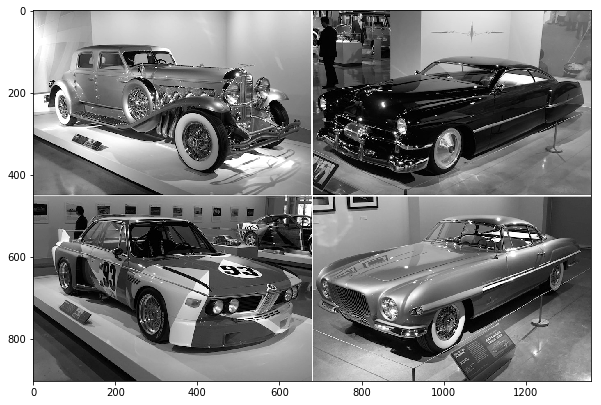

In [3]:
car = skimage.io.imread("./images/cars.jpeg")
car = color.rgb2gray(car)

plt.figure(figsize=(10,8))
plt.imshow(car,cmap="gray")

In [7]:
descs_array, descs_image = daisy(car, step=400, radius = 20, visualize = True)
# smaller step size means sampling the photo in a dense way

In [9]:
descs_num = descs_array.shape[0] * descs_array.shape[1]
descs_num

12

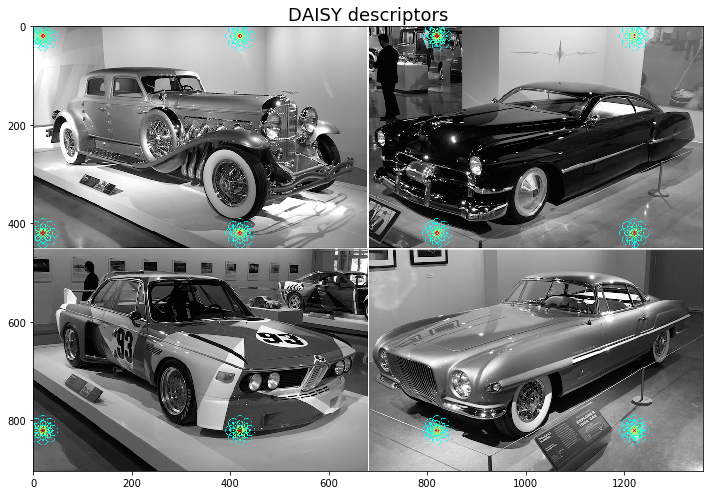

In [10]:
plt.figure(figsize=(12,10))
plt.title("DAISY descriptors", fontsize=18)
plt.imshow(descs_image)

#### HOG descriptor (Histogram of Oriented Gradients)

In [11]:
import matplotlib.pyplot as plt
import skimage
from skimage.feature import hog
from skimage import data, color, io, exposure

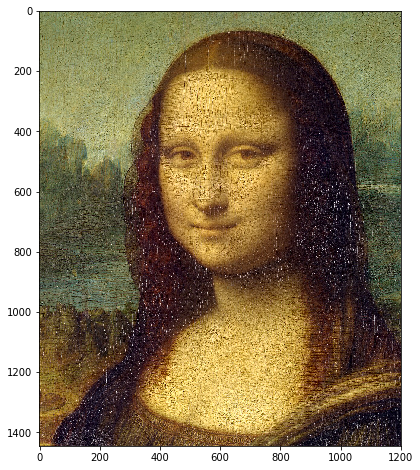

In [12]:
monalisa = skimage.io.imread("./images/monalisa.jpg")
plt.figure(figsize=(10,8))
plt.imshow(monalisa,cmap="gray")

In [19]:
fd, hog_image = hog(monalisa,
                   pixels_per_cell = (8,8), # the bigger the numbers here, the more coarse the contours would be
                   block_norm="L2-Hys",
                   visualize=True,
                   multichannel=True) # set multichannel to True if this is a color image

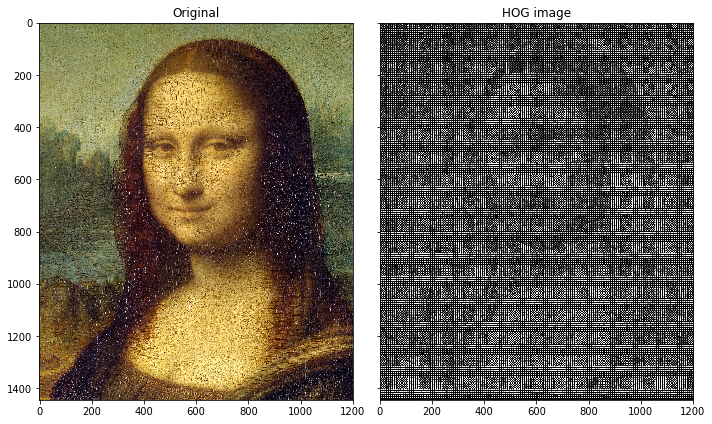

In [20]:
fig, axes = plt.subplots(1,2,
                        figsize=(10,8),
                        sharex=True,sharey=True)

ax = axes.ravel()

ax[0].imshow(monalisa,cmap="gray")
ax[0].set_title("Original")


# strech or shrink the intensity levels of the image - results in a higher contrast image
hog_image_rescaled = exposure.rescale_intensity(hog_image,
                                               in_range=(0,10))

ax[1].imshow(hog_image_rescaled,cmap="gray")
ax[1].set_title("HOG image")

plt.tight_layout()
plt.show()